<a href="https://colab.research.google.com/github/tanejajatin1/deep_learning/blob/main/Gradient_Descent_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sympy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-1-12c8d55f4d4b>:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [ ]:
# Calculate the diff using

In [2]:
# Function as a function
def fx(x):
  return np.cos(2 * np.pi * x) + x**2

# Derivative function
def deriv(x):
  return 2 * x - 2 * np.pi * np.sin(2 * np.pi * x)

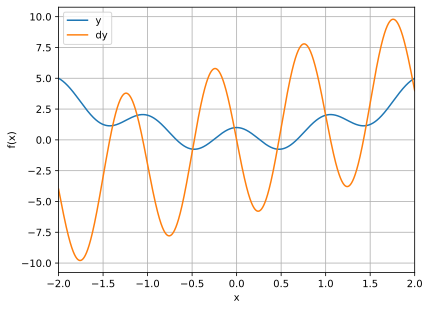

In [3]:
# Plot these two functions

# define the range of x
x = np.linspace(-2, 2, 2001)

# Plot
plt.plot(x, fx(x), x, deriv(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(('y', 'dy'))
plt.show()

In [22]:
# Algorithm

# If we apply zero to local minima, gradient descend will fail here and find local maxima instead of minima
# This is the case of vanishing gradient as there is no learning at all. It's always going to be zero
# localmin = np.array([0])
localmin = np.random.choice(x, 1) # select any random number from the x vector
print(f'Started at: {localmin}')
# Learning parameters
learning_rate = 0.01
training_epochs = 100

# Loop through training
modelparams = np.zeros((training_epochs, 2))
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad
  modelparams[i, :] = localmin, grad
print(f'Computed after gradient descent: {localmin}')

Started at: [0.618]
Computed after gradient descent: [0.47580245]


<ipython-input-22-251012905062>:17: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  modelparams[i, :] = localmin, grad


<ipython-input-23-26b50cda9a58>:9: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('f(x)', 'df' 'f(x) min')


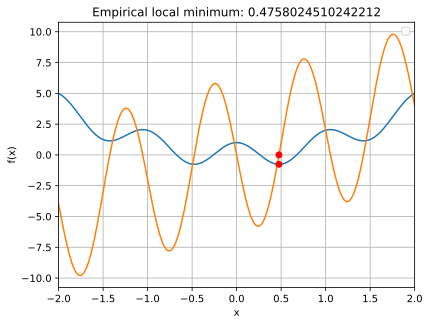

In [23]:

# Plot
plt.plot(x, fx(x), x, deriv(x))
plt.plot(localmin, deriv(localmin), 'ro')
plt.plot(localmin, fx(localmin), 'ro')
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend('f(x)', 'df' 'f(x) min')
plt.title('Empirical local minimum: %s' %localmin[0])
plt.show()

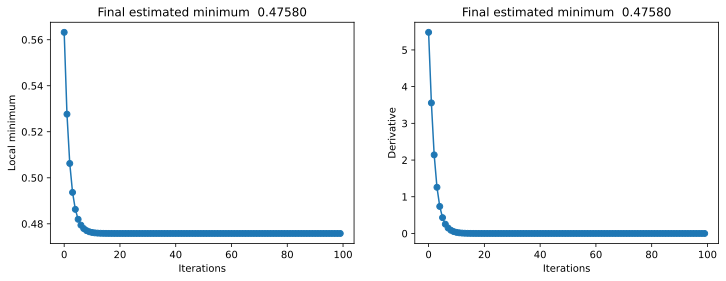

In [24]:
# Plot for gradient over iterations

fig, ax = plt.subplots(1, 2, figsize = (12, 4))
for i in range(2):
  ax[i].plot(modelparams[:, i], 'o-')
  ax[i].set_xlabel('Iterations')
  ax[i].set_title(f'Final estimated minimum {localmin[0]: .5f}')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

plt.show()